In [26]:
%matplotlib inline
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
#import stanford_mir; stanford_mir.init()

In [27]:
plt.style.use('seaborn-muted')
plt.rcParams['figure.figsize'] = (14, 5)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = None

In [28]:
#x, sr = librosa.load('audio/africa-toto.wav')
x, sr = librosa.load('recording0.wav')

In [29]:
ipd.Audio(x, rate=sr)

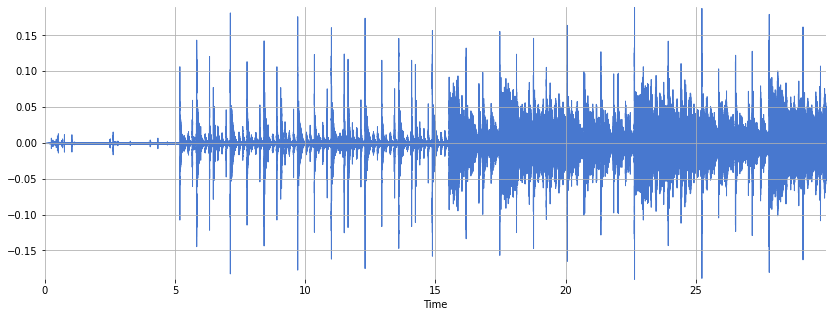

In [30]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr)

In [31]:
onset_frames = librosa.onset.onset_detect(x, sr=sr, wait=1, pre_avg=1, post_avg=1, pre_max=1, post_max=1)
print(onset_frames) # frame numbers of estimated onsets

[  11   29   33   45  108  113  142  175  187  203  223  237  244  251
  266  272  279  287  293  300  307  321  328  334  349  355  362  377
  384  390  398  404  411  418  433  439  446  460  467  474  502  509
  516  523  529  544  550  557  571  578  585  600  606  613  621  627
  634  641  655  662  669  690  697  718  725  739  752  808  823  830
  836  864  885  892  913  920  941  947  961  975 1003 1031 1059 1087
 1114 1136 1142 1157 1163 1170 1184 1198 1226 1247 1254 1282]


In [32]:
onset_times = librosa.frames_to_time(onset_frames)
print(onset_times)

[ 0.2554195   0.67337868  0.7662585   1.04489796  2.5077551   2.62385488
  3.29723356  4.06349206  4.34213152  4.71365079  5.17804989  5.50312925
  5.66566893  5.82820862  6.17650794  6.31582766  6.47836735  6.66412698
  6.80344671  6.96598639  7.12852608  7.45360544  7.61614512  7.75546485
  8.10376417  8.2430839   8.40562358  8.7539229   8.91646259  9.05578231
  9.24154195  9.38086168  9.54340136  9.70594104 10.05424036 10.19356009
 10.35609977 10.68117914 10.84371882 11.0062585  11.65641723 11.81895692
 11.9814966  12.14403628 12.28335601 12.63165533 12.77097506 12.93351474
 13.2585941  13.42113379 13.58367347 13.93197279 14.07129252 14.2338322
 14.41959184 14.55891156 14.72145125 14.88399093 15.20907029 15.37160998
 15.53414966 16.02176871 16.18430839 16.67192744 16.83446712 17.15954649
 17.4614059  18.76172336 19.11002268 19.27256236 19.41188209 20.06204082
 20.54965986 20.71219955 21.19981859 21.36235828 21.84997732 21.98929705
 22.31437642 22.63945578 23.28961451 23.93977324 24.

In [33]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(S))

C:\Users\AlexW\Anaconda3\lib\site-packages\librosa\display.py:862: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\AlexW\Anaconda3\lib\site-packages\librosa\display.py:862: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\AlexW\Anaconda3\lib\site-packages\librosa\display.py:862: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


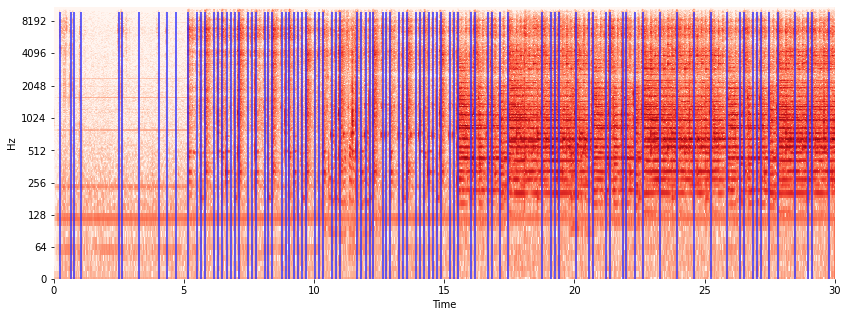

In [34]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(logS, sr=sr, x_axis='time', y_axis='log', cmap='Reds')
plt.vlines(onset_times, 0, 10000, color='#3333FF')

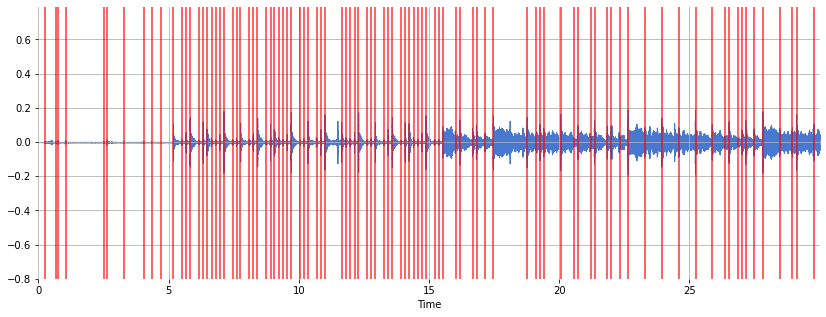

In [35]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
plt.vlines(onset_times, -0.8, 0.79, color='r', alpha=0.8) 

In [36]:
clicks = librosa.clicks(frames=onset_frames, sr=sr, length=len(x))

In [37]:
ipd.Audio(x + clicks, rate=sr)

In [25]:
ipd.Audio(numpy.vstack([x, clicks]), rate=sr)